In [1]:
pwd()
using Pkg; Pkg.activate("../../../FermiCG/")
using FermiCG, NPZ, JLD2
using Plots
using PyCall
using Printf

readdir()

  Activating environment at `~/code/FermiCG/Project.toml`


2-element Vector{String}:
 ".ipynb_checkpoints"
 "Untitled.ipynb"

In [2]:
molecule = "
He         0.85362        0.85362        0.84099
He         0.85362       -0.85362        0.84099
He        -0.85362       -0.85362        0.84099
He        -0.85362        0.85362        0.84099
He         0.00000        1.20720       -0.84099
He         1.20720       -0.00000       -0.84099
He        -0.00000       -1.20720       -0.84099
He        -1.20720        0.00000       -0.84099
"
atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

basis = "aug-cc-pvdz"
# 
# Create FermiCG.Molecule type
mol     = Molecule(0, 1, atoms,basis);


pyscf = pyimport("pyscf")
# pyscf.lib.num_threads(1)


pymol = pyscf.gto.Mole(atom=molecule,
    symmetry = false, spin =0,charge=0,
    basis = basis)

pymol.build()
mf = pyscf.scf.RHF(pymol)
mf.verbose = 4
mf.conv_tol = 1e-8
mf.conv_tol_grad = 1e-5
mf.run(max_cycle=200)

rdm_mf = mf.make_rdm1()

@printf(" Hartree-Fock Energy: %12.8f", mf.e_tot)
pyscfcc = pyimport("pyscf.cc")

mycc = pyscfcc.CCSD(mf).run()
@printf("CCSD total energy    %12.8f\n", mycc.e_tot)
et = mycc.ccsd_t()
@printf("CCSD(T) total energy %12.8f\n", mycc.e_tot + et)




******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-05
SCF max_cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /var/folders/td/qpnnxwv93pq0t7bbdkh5rvzr0000gn/T/tmpjfrqt9sz
max_memory 4000 MB (current use 0 MB)
init E= -23.0029371547145
  HOMO = -0.781226094780553  LUMO = 0.188344388350438
cycle= 1 E= -22.7636346798558  delta_E= 0.239  |g|= 0.0388  |ddm|= 0.541
  HOMO = -0.832756078066008  LUMO = 0.189029787170438
cycle= 2 E= -22.7640765034534  delta_E= -0.000442  |g|= 0.00676  |ddm|= 0.0372
  HOMO = -0.832418320485228  LUMO = 0.189120014073822
cycle= 3 E= -22.7640926606618  delta_E= -1.62e-05  |g|= 0.000208  |ddm|= 0.00886
  HOMO = -0.83242994588109  LUMO = 0.189116623909147
cycle= 4 E= -22.7640926766947  delta_E= -1.6e-08  |g|= 1.82e-05  |ddm|= 0.000524
  HOMO = -

    8

    He       0.8963010000000001       0.8963010000000001       0.8830395000000001 
    He       0.8963010000000001      -0.8963010000000001       0.8830395000000001 
    He      -0.8963010000000001      -0.8963010000000001       0.8830395000000001 
    He      -0.8963010000000001       0.8963010000000001       0.8830395000000001 
    He       0.0000000000000000       1.2675600000000000      -0.8830395000000001 
    He       1.2675600000000000      -0.0000000000000000      -0.8830395000000001 
    He      -0.0000000000000000      -1.2675600000000000      -0.8830395000000001 
    He      -1.2675600000000000       0.0000000000000000      -0.8830395000000001 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-08
SCF max_cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF r

 Hartree-Fock Energy: -22.82766575E(CCSD) = -23.10210458437189  E_corr = -0.2744388317160178
CCSD total energy    -23.10210458
CCSD(T) correction = -0.000261521329688215
CCSD(T) total energy -23.10236611
    8

    He       1.0670250000000001       1.0670250000000001       1.0512375000000000 
    He       1.0670250000000001      -1.0670250000000001       1.0512375000000000 
    He      -1.0670250000000001      -1.0670250000000001       1.0512375000000000 
    He      -1.0670250000000001       1.0670250000000001       1.0512375000000000 
    He       0.0000000000000000       1.5090000000000001      -1.0512375000000000 
    He       1.5090000000000001      -0.0000000000000000      -1.0512375000000000 
    He      -0.0000000000000000      -1.5090000000000001      -1.0512375000000000 
    He      -1.5090000000000001       0.0000000000000000      -1.0512375000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84198426E(CCSD) = -23.11475055147274  E_corr = -0.2727662922150368
CCSD total energy    -23.11475055
CCSD(T) correction = -0.000123900020637566
CCSD(T) total energy -23.11487445
    8

    He       1.2377490000000000       1.2377490000000000       1.2194354999999999 
    He       1.2377490000000000      -1.2377490000000000       1.2194354999999999 
    He      -1.2377490000000000      -1.2377490000000000       1.2194354999999999 
    He      -1.2377490000000000       1.2377490000000000       1.2194354999999999 
    He       0.0000000000000000       1.7504400000000000      -1.2194354999999999 
    He       1.7504400000000000      -0.0000000000000000      -1.2194354999999999 
    He      -0.0000000000000000      -1.7504400000000000      -1.2194354999999999 
    He      -1.7504400000000000       0.0000000000000000      -1.2194354999999999 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84508020E(CCSD) = -23.11691406027062  E_corr = -0.2718338604486426
CCSD total energy    -23.11691406
CCSD(T) correction = -5.85683876118917e-05
CCSD(T) total energy -23.11697263
    8

    He       1.4084730000000001       1.4084730000000001       1.3876335000000000 
    He       1.4084730000000001      -1.4084730000000001       1.3876335000000000 
    He      -1.4084730000000001      -1.4084730000000001       1.3876335000000000 
    He      -1.4084730000000001       1.4084730000000001       1.3876335000000000 
    He       0.0000000000000000       1.9918799999999999      -1.3876335000000000 
    He       1.9918799999999999      -0.0000000000000000      -1.3876335000000000 
    He      -0.0000000000000000      -1.9918799999999999      -1.3876335000000000 
    He      -1.9918799999999999       0.0000000000000000      -1.3876335000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84561835E(CCSD) = -23.11694869585597  E_corr = -0.2713303468480242
CCSD total energy    -23.11694870
CCSD(T) correction = -2.8802668434774e-05
CCSD(T) total energy -23.11697750
    8

    He       1.5791970000000002       1.5791970000000002       1.5558315000000000 
    He       1.5791970000000002      -1.5791970000000002       1.5558315000000000 
    He      -1.5791970000000002      -1.5791970000000002       1.5558315000000000 
    He      -1.5791970000000002       1.5791970000000002       1.5558315000000000 
    He       0.0000000000000000       2.2333200000000004      -1.5558315000000000 
    He       2.2333200000000004      -0.0000000000000000      -1.5558315000000000 
    He      -0.0000000000000000      -2.2333200000000004      -1.5558315000000000 
    He      -2.2333200000000004       0.0000000000000000      -1.5558315000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
D

 Hartree-Fock Energy: -22.84565808E(CCSD) = -23.11672961951755  E_corr = -0.2710715418245828
CCSD total energy    -23.11672962
CCSD(T) correction = -1.50522728119249e-05
CCSD(T) total energy -23.11674467
    8

    He       1.7499209999999998       1.7499209999999998       1.7240294999999999 
    He       1.7499209999999998      -1.7499209999999998       1.7240294999999999 
    He      -1.7499209999999998      -1.7499209999999998       1.7240294999999999 
    He      -1.7499209999999998       1.7499209999999998       1.7240294999999999 
    He       0.0000000000000000       2.4747599999999998      -1.7240294999999999 
    He       2.4747599999999998      -0.0000000000000000      -1.7240294999999999 
    He      -0.0000000000000000      -2.4747599999999998      -1.7240294999999999 
    He      -2.4747599999999998       0.0000000000000000      -1.7240294999999999 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84564766E(CCSD) = -23.11658279744793  E_corr = -0.2709351363226581
CCSD total energy    -23.11658280
CCSD(T) correction = -8.37720423661825e-06
CCSD(T) total energy -23.11659117
    8

    He       1.9206450000000002       1.9206450000000002       1.8922275000000000 
    He       1.9206450000000002      -1.9206450000000002       1.8922275000000000 
    He      -1.9206450000000002      -1.9206450000000002       1.8922275000000000 
    He      -1.9206450000000002       1.9206450000000002       1.8922275000000000 
    He       0.0000000000000000       2.7162000000000002      -1.8922275000000000 
    He       2.7162000000000002      -0.0000000000000000      -1.8922275000000000 
    He      -0.0000000000000000      -2.7162000000000002      -1.8922275000000000 
    He      -2.7162000000000002       0.0000000000000000      -1.8922275000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84564187E(CCSD) = -23.11650104547127  E_corr = -0.2708591786856956
CCSD total energy    -23.11650105
CCSD(T) correction = -4.92641176211464e-06
CCSD(T) total energy -23.11650597
    8

    He       2.0913690000000003       2.0913690000000003       2.0604255000000000 
    He       2.0913690000000003      -2.0913690000000003       2.0604255000000000 
    He      -2.0913690000000003      -2.0913690000000003       2.0604255000000000 
    He      -2.0913690000000003       2.0913690000000003       2.0604255000000000 
    He       0.0000000000000000       2.9576400000000005      -2.0604255000000000 
    He       2.9576400000000005      -0.0000000000000000      -2.0604255000000000 
    He      -0.0000000000000000      -2.9576400000000005      -2.0604255000000000 
    He      -2.9576400000000005       0.0000000000000000      -2.0604255000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84563923E(CCSD) = -23.11645475985824  E_corr = -0.2708155251415426
CCSD total energy    -23.11645476
CCSD(T) correction = -3.03237649264119e-06
CCSD(T) total energy -23.11645779
    8

    He       2.2620930000000006       2.2620930000000006       2.2286235000000003 
    He       2.2620930000000006      -2.2620930000000006       2.2286235000000003 
    He      -2.2620930000000006      -2.2620930000000006       2.2286235000000003 
    He      -2.2620930000000006       2.2620930000000006       2.2286235000000003 
    He       0.0000000000000000       3.1990800000000004      -2.2286235000000003 
    He       3.1990800000000004      -0.0000000000000000      -2.2286235000000003 
    He      -0.0000000000000000      -3.1990800000000004      -2.2286235000000003 
    He      -3.1990800000000004       0.0000000000000000      -2.2286235000000003 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84563815E(CCSD) = -23.11642831152183  E_corr = -0.2707901605920595
CCSD total energy    -23.11642831
CCSD(T) correction = -1.93849470862719e-06
CCSD(T) total energy -23.11643025
    8

    He       2.4328170000000000       2.4328170000000000       2.3968215000000002 
    He       2.4328170000000000      -2.4328170000000000       2.3968215000000002 
    He      -2.4328170000000000      -2.4328170000000000       2.3968215000000002 
    He      -2.4328170000000000       2.4328170000000000       2.3968215000000002 
    He       0.0000000000000000       3.4405200000000002      -2.3968215000000002 
    He       3.4405200000000002      -0.0000000000000000      -2.3968215000000002 
    He      -0.0000000000000000      -3.4405200000000002      -2.3968215000000002 
    He      -3.4405200000000002       0.0000000000000000      -2.3968215000000002 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84563779E(CCSD) = -23.1164130987871  E_corr = -0.2707753124591947
CCSD total energy    -23.11641310
CCSD(T) correction = -1.279403956452e-06
CCSD(T) total energy -23.11641438


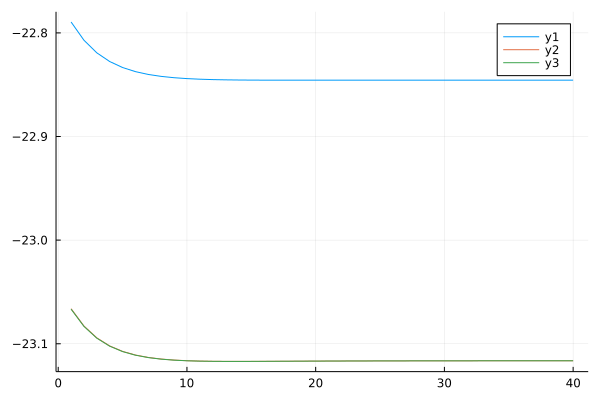

In [3]:
n_steps = 40
step_size = .05

pymol_init = pyscf.gto.Mole(atom=molecule,
    symmetry = false, spin =0,charge=0,
    basis = basis)
pymol.build()


io = open("traj.xyz", "w");
energies_scf = []
energies_ccsd = []
energies_ccsdt = []

for R in 1:n_steps

    pymol = deepcopy(pymol_init)
    scale = 1+R*step_size

    xyz = @sprintf("%5i\n\n", length(mol.atoms))
    tmp = []
    for a in mol.atoms
        push!(tmp, ["He", (a.xyz[1]*scale, a.xyz[2]*scale, a.xyz[3]*scale)])
        xyz = xyz * @sprintf("%6s %24.16f %24.16f %24.16f \n", a.symbol, a.xyz[1]*scale, a.xyz[2]*scale, a.xyz[3]*scale)
    end
    pymol.atom = tmp
    pymol.build()
    
    
    println(xyz)
    write(io, xyz);
   
    
#     println(pymol.format_atom(1))
    
    #     mol_R = Molecule(0, 1, [a[0]pymol.atom, pymol.basis)


    mf = pyscf.scf.RHF(pymol)
    mf.verbose = 4
    mf.conv_tol = 1e-8
    mf.conv_tol_grad = 1e-8
    mf.run(max_cycle=200)

    rdm_mf = mf.make_rdm1()
    @printf(" Hartree-Fock Energy: %12.8f", mf.e_tot)

    push!(energies_scf, mf.e_tot)
    
    pyscfcc = pyimport("pyscf.cc")

    mycc = pyscfcc.CCSD(mf).run()
    @printf("CCSD total energy    %12.8f\n", mycc.e_tot)
    
    et = mycc.ccsd_t()
    @printf("CCSD(T) total energy %12.8f\n", mycc.e_tot + et)

    
    push!(energies_ccsd, mycc.e_tot)
    push!(energies_ccsdt, mycc.e_tot+et)

end
close(io);
plot([energies_scf, energies_ccsd, energies_ccsdt])

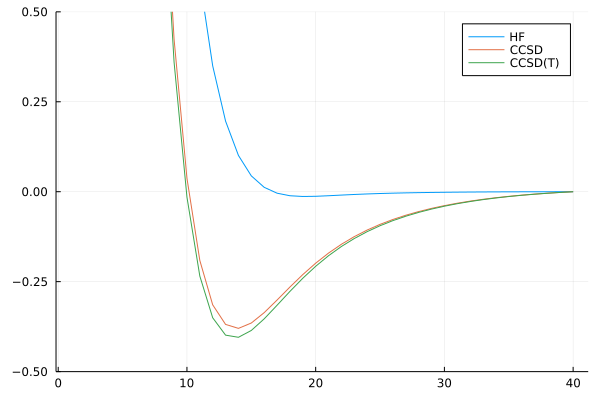

In [4]:
plot([energies_scf.-energies_scf[end], energies_ccsd.-energies_ccsd[end], energies_ccsdt.-energies_ccsdt[end]]*627.51, 
labels = ["HF" "CCSD" "CCSD(T)"])
ylims!((-.5,.5))